In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sort_dataframeby_monthorweek import *
from sorted_months_weekdays import *
from collections import Counter
from itertools import combinations

In [3]:
data=pd.read_csv("c:/users/daniel/downloads/StudentsPerformance.csv")

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:xlabel='math score', ylabel='Count'>

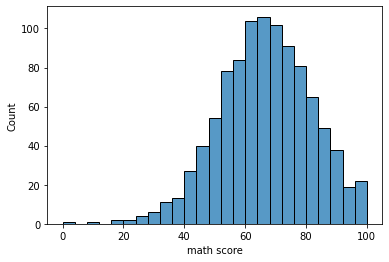

In [9]:
sb.histplot(data["math score"])

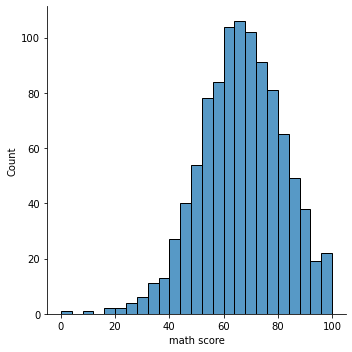

In [12]:
sb.displot(data["math score"])

plt.show()

In [15]:
data.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [16]:
data.groupby("gender").median()

,math score,reading score,writing score
gender,,,
female,65,73,74
male,69,66,64


In [17]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [19]:
data.groupby("race/ethnicity").median()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.0,64.0,62.0
group B,63.0,67.0,67.0
group C,65.0,71.0,68.0
group D,69.0,71.0,72.0
group E,74.5,74.0,72.0


In [20]:
data.groupby("parental level of education").median()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.0,72.5,70.5
bachelor's degree,68.0,73.0,74.0
high school,63.0,66.0,64.0
master's degree,73.0,76.0,75.0
some college,67.5,70.5,70.0
some high school,65.0,67.0,66.0


<ipython-input-28-30d4ae0cc838>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data.groupby("parental level of education").median().index, rotation="vertical")


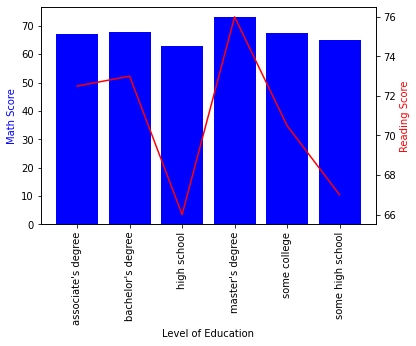

In [28]:
fig, ax1 = plt.subplots()

ax2=ax1.twinx()

ax1.bar(data.groupby("parental level of education").median().index, data.groupby("parental level of education").median()["math score"], color="b")
ax2.plot(data.groupby("parental level of education").median().index, data.groupby("parental level of education").median()["reading score"], "b-", color="r")

ax1.set_xlabel("Level of Education")
ax1.set_ylabel("Math Score", color="b")
ax2.set_ylabel("Reading Score", color="r")

ax1.set_xticklabels(data.groupby("parental level of education").median().index, rotation="vertical")

plt.show()

In [21]:
data.groupby("lunch").median()

,math score,reading score,writing score
lunch,,,
free/reduced,60,65,64
standard,69,72,72


In [22]:
data.groupby("test preparation course").median()

,math score,reading score,writing score
test preparation course,,,
completed,69,75,76
none,64,67,65


In [31]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### nunique shows the number of unique values in a column

In [32]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [34]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

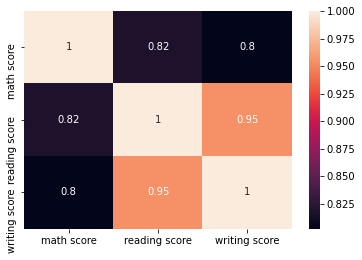

In [37]:
sb.heatmap(data.corr(), annot=True)

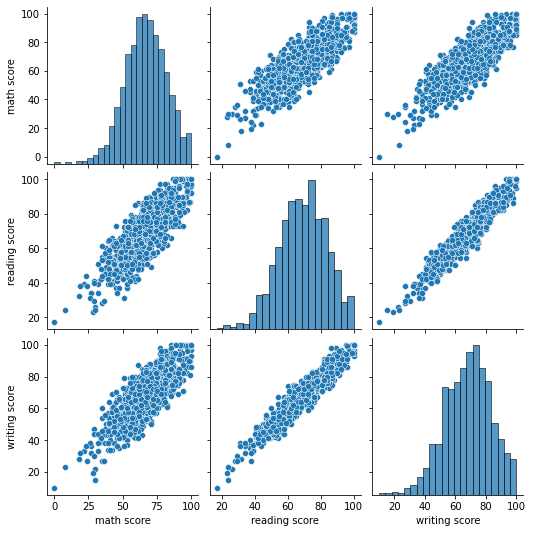

In [38]:
sb.pairplot(data)

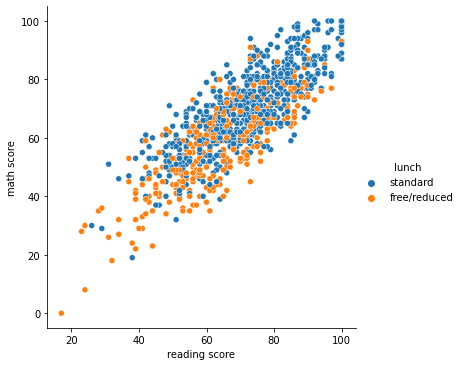

In [47]:
sb.relplot(y="math score", x= "reading score", hue="lunch", data=data)

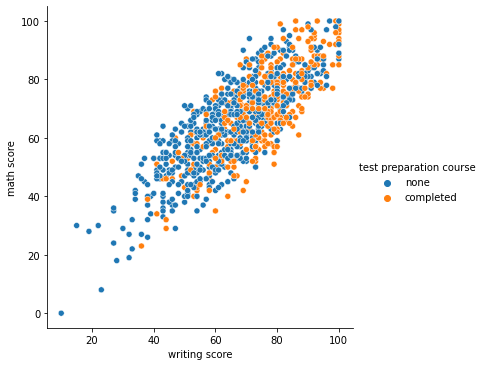

In [49]:
sb.relplot(x="writing score", y="math score", hue="test preparation course", data=data)

plt.show()

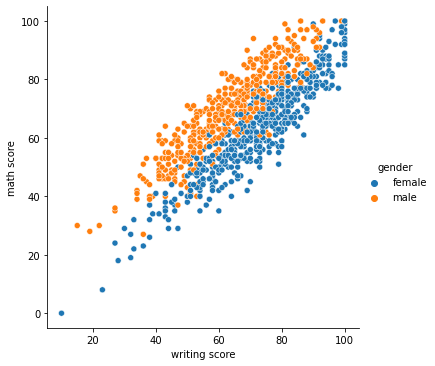

In [50]:
sb.relplot(x="writing score", y="math score", hue="gender", data=data)

plt.show()

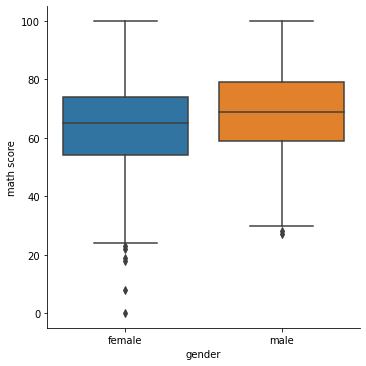

In [61]:
sb.catplot(x="gender", y="math score", data=data, kind="box")

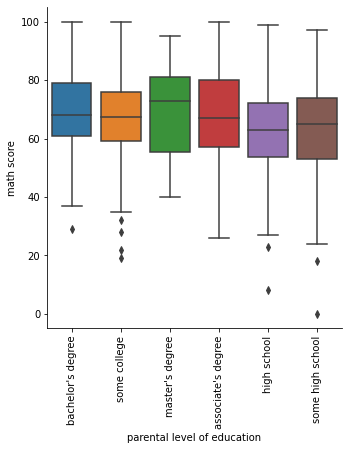

In [66]:
sb.catplot(x="parental level of education", y="math score", data=data, kind="box")

plt.xticks(rotation="vertical")
plt.show()

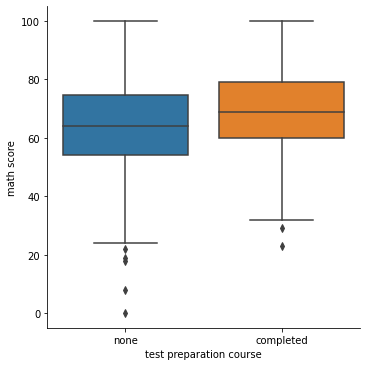

In [68]:
sb.catplot(x="test preparation course", y="math score", data=data, kind="box")

plt.show()

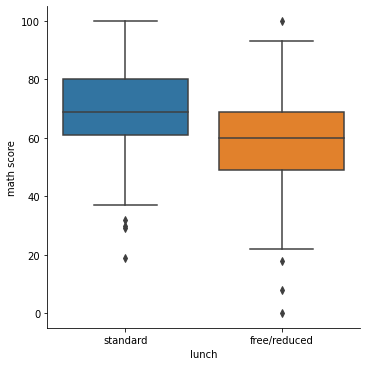

In [69]:
sb.catplot(x="lunch", y="math score", data=data, kind="box")

plt.show()